In [ ]:
from zipfile36 import ZipFile

file_name = 'stack-overflow-2018-developer-survey.zip'

with ZipFile(file_name, 'r') as zip:
    zip.printdir()
    
    zip.extractall()



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

to_drop = ['Respondent', 'HopeFiveYears', 'LastNewJob', 'AssessJob1',
           'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5',
           'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9',
           'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3',
           'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7',
           'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11',
           'JobContactPriorities1',  'JobContactPriorities2', 'JobContactPriorities3',
           'JobContactPriorities4',  'JobContactPriorities5', 'JobEmailPriorities1',
           'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4',
           'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities7',
           'UpdateCV', 'IDE', 'OperatingSystem', 'NumberMonitors',
           'VersionControl',  'CheckInCode', 'AdBlocker', 'AdBlockerDisable',
           'AdBlockerReasons', 'AdsAgreeDisagree1', 'AdsAgreeDisagree2',
           'AdsAgreeDisagree3', 'AdsActions', 'AdsPriorities1',
           'AdsPriorities2', 'AdsPriorities3', 'AdsPriorities4',
           'AdsPriorities5', 'AdsPriorities6', 'AdsPriorities7',
           'AIDangerous', 'AIInteresting', 'AIResponsible', 'AIFuture',
           'EthicsChoice', 'EthicsReport', 'EthicsResponsible', 'EthicalImplications',
           'StackOverflowRecommend',  'StackOverflowVisit', 'StackOverflowHasAccount',
           'StackOverflowJobs', 'StackOverflowDevStory', 'StackOverflowJobsRecommend',
           'StackOverflowConsiderMember', 'HypotheticalTools1', 'HypotheticalTools2',
           'HypotheticalTools3',  'HypotheticalTools4', 'HypotheticalTools5',
           'WakeTime', 'MilitaryUS', 'SexualOrientation', 'Dependents', 'RaceEthnicity',
           'SkipMeals', 'HoursOutside',  'EducationParents', 'ErgonomicDevices',          
          'SurveyTooLong',
          'SurveyEasy',
          'StackOverflowParticipate',
           'Salary',
           'Currency',
           'SalaryType',
           'CommunicationTools',
           'TimeFullyProductive',
           'HackathonReasons',
           'Gender',
                    
          ]
for col in df:
    if df[col].dtype == 'O':
        df[col] = df[col].astype('category')
    
    
df.drop(to_drop, inplace=True, axis=1)
df.dropna(subset=['Country'], inplace=True)
df.dropna(subset=['ConvertedSalary'], inplace=True)
df['Student'].fillna('No', inplace=True)
df['Employment'].fillna('Not employed, and not looking for work', inplace=True)
df['FormalEducation'].fillna('Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)', inplace=True)
df['UndergradMajor'].fillna('I never declared a major', inplace=True)
df['CompanySize'].cat.add_categories('Not Employed').fillna('Not Employed', inplace=True)
df['DevType'].fillna('Student', inplace=True)
df['YearsCoding'].fillna('0-2 years', inplace=True)
df['YearsCodingProf'].fillna('0-2 years', inplace=True)
df['JobSatisfaction'].fillna('Neither satisfied nor dissatisfied', inplace=True)
df['CareerSatisfaction'].fillna('Neither satisfied nor dissatisfied', inplace=True)
df['JobSearchStatus'].fillna('I’m not actively looking, but I am open to new opportunities', inplace=True)
df['TimeAfterBootcamp'].fillna('I haven’t gotten a developer job', inplace=True)
df['HoursComputer'].fillna('1 - 4 hours', inplace=True)
df['Age'].fillna('25 - 34 years old', inplace=True)
#Removing outliers for 'Converted Salary'
df.drop(df[df['ConvertedSalary'] > 300000].index, inplace=True)

<h1>Experience and age vs salaries

1. Is there a correlation between the years of experience of a developer and their salary? What about age?

YearsCodingProf
0-2 years            22032.0
3-5 years            44449.0
6-8 years            59880.0
9-11 years           70985.0
12-14 years          80521.0
15-17 years          88116.0
18-20 years          95552.0
21-23 years         102804.0
24-26 years         105000.0
27-29 years         106978.0
30 or more years    111061.5
Name: ConvertedSalary, dtype: float64

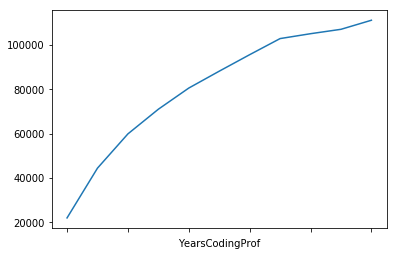

In [4]:
##Clean the years coding column
"""
years_coding_ranges = df['YearsCoding'].unique()
years_coding_ranges = years_coding_ranges.astype(list)
years_coding_count = pd.Series([df.loc[:, "YearsCoding"].dropna().str.contains(year_range).sum()
                                for year_range in years_coding_ranges],
                              index=years_coding_ranges,
                              name='Years_coding_count')
years_coding_count = years_coding_count.sort_values(ascending=False)
#years_coding_count.plot(kind='bar', figsize=(12,6))
"""
years_coding_salary = df.groupby('YearsCodingProf').ConvertedSalary.median().sort_values(ascending=True)
years_coding_salary.plot(kind='line')
years_coding_salary


##TODO: add line graph

As to be expected, there seems to be a direct correlation between experience and salary.  Salaries steadily increase as experience accumulates.

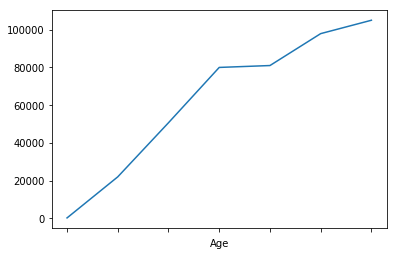

In [5]:
##AGE?
age_salary = df.groupby('Age').ConvertedSalary.median().sort_values()
age_salary.plot(kind='line')

While years of experience isn't completely dependant on age, the older guys are more likely to have more years of experience.

<h1>Bootcamp Education and Salaries

2. Is there any relationship between bootcamp education and salaries? What about formal education?

In [5]:
education_types = df['EducationTypes'].str.split(';', expand=True).stack().unique()

education_counts = pd.Series([df.loc[:, 'EducationTypes'].str.contains(eduType, regex=False).sum()
           for eduType in education_types],
         index=education_types).sort_values(ascending=False)
#education_counts.plot(kind='bar', figsize=(12,6))

Taken a part-time in-person course in programming or software development            49752.0
Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)     50904.0
Taken an online course in programming or software development (e.g. a MOOC)          52000.0
Taught yourself a new language, framework, or tool without taking a formal course    56256.0
Participated in a full-time developer training program or bootcamp                   56352.0
Participated in a hackathon                                                          61194.0
Received on-the-job training in software development                                 62000.0
Contributed to open source software                                                  63762.0
Completed an industry certification program (e.g. MCPD)                              66027.0
dtype: float64

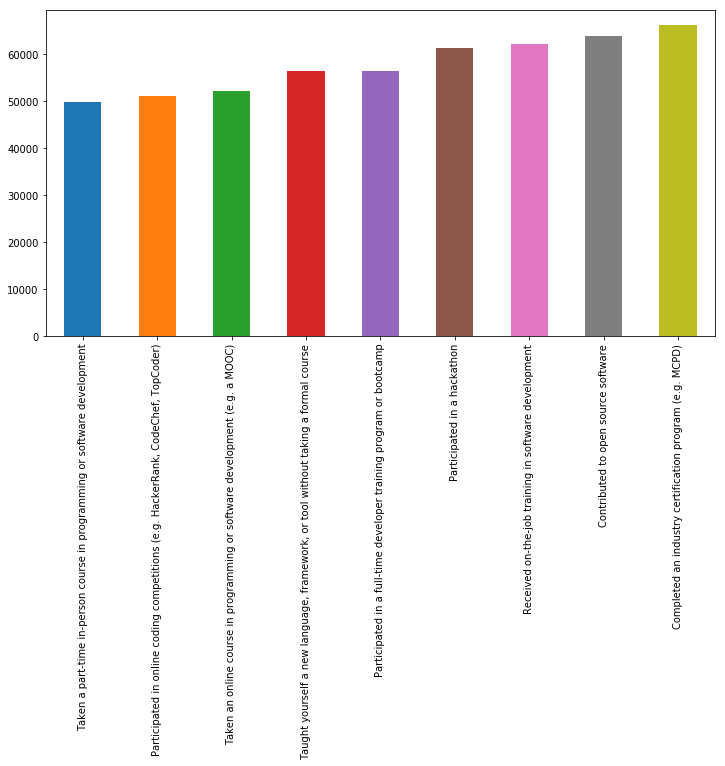

In [6]:
edutype_index = pd.Series([df.loc[:, 'EducationTypes'].str.contains(eduType, regex=False)
                           for eduType in education_types],
                          index=education_types,
                          name='EduType_count')

edutype_salary = pd.Series([df[edutype_index[i].fillna(False)]['ConvertedSalary'].median()
                           for i in np.arange(len(education_types))],
                           index=education_types).sort_values(ascending=True)
edutype_salary.plot(kind='bar', figsize=(12,6))
edutype_salary


I am not able to derive a direct correlation from this dataset, as respondents could have other education besides bootcamps. Respondents that did participate in a bootcamp reported salaries higher median salaries than a few other options, which shows that they are effective in preparing students.

<h3>Experience vs Technology/Languages<h3>

3. Is there any relationship between years of experience and the technologies/languages employed by developers?

In [11]:
language_types = df['LanguageWorkedWith'].str.split(';', expand=True).stack().unique()

language_counts = pd.Series([df.loc[:, 'LanguageWorkedWith'].str.contains(languageType, regex=False).sum()
           for languageType in language_types],
         index=language_types).sort_values(ascending=False)

<h3>Development Types vs Salary<h3>

4. Which are the top-three the most common dev types per country? And which are the best paid ones?

In [6]:
all_dev_types = df['DevType'].str.split(';', expand=True).stack().unique()

devtype_count = pd.Series([df.loc[:, 'DevType'].str.contains(devType, regex=False).sum()
                           for devType in all_dev_types],
                          index=all_dev_types,
                          name='DevType_count')

devtype_index = pd.Series([df.loc[:, 'DevType'].str.contains(devType, regex=False)
                           for devType in all_dev_types],
                          index=all_dev_types,
                          name='DevType_count')

In [10]:
df['Country']

NameError: name 'sub_df' is not defined

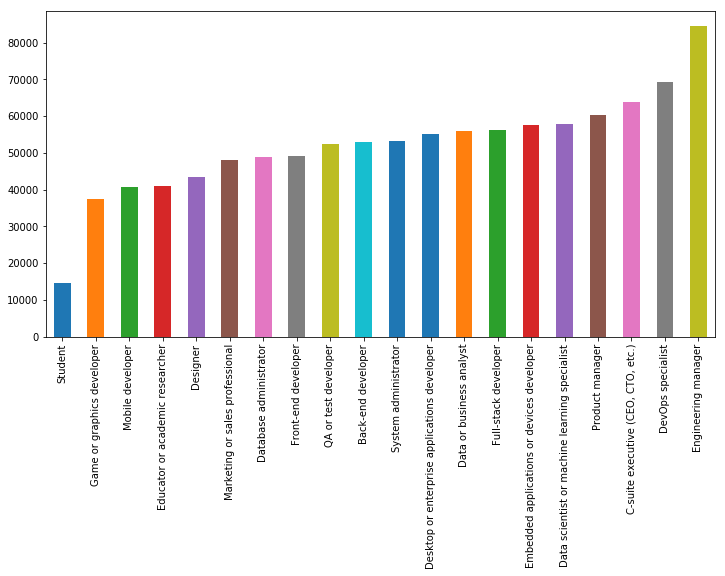

In [8]:
devtype_salary = pd.Series([df[devtype_index[i].fillna(False)]['ConvertedSalary'].median()
                            for i in np.arange(len(all_dev_types))],
                           index=all_dev_types,
                           name='DevType_ConvertedSalary').sort_values(ascending=True)

devtype_salary.plot(kind='bar', figsize=(12,6))

In [11]:
sub_df = df[['Country','DevType']]


In [13]:
sub_df['Country'].unique()


[United Kingdom, South Africa, United States, Netherlands, Sweden, ..., Monaco, Guyana, Côte d'Ivoire, Dominica, Eritrea]
Length: 157
Categories (157, object): [United Kingdom, South Africa, United States, Netherlands, ..., Guyana, Côte d'Ivoire, Dominica, Eritrea]

In [14]:
dummies_1 = pd.get_dummies(sub_df['DevType'].str.split(';', expand=True).apply(lambda s: s.str.strip()).stack(), prefix_sep='').sum(level=0)

print(dummies_1.shape)
dummie_df = pd.DataFrame(dummies_1)

country_devtypes = pd.concat([sub_df['Country'], dummie_df], axis=1)



country_devtypes.head(5)

(45738, 20)


,Country,Back-end developer,"C-suite executive (CEO, CTO, etc.)",Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,Desktop or enterprise applications developer,DevOps specialist,Educator or academic researcher,...,Engineering manager,Front-end developer,Full-stack developer,Game or graphics developer,Marketing or sales professional,Mobile developer,Product manager,QA or test developer,Student,System administrator
1,United Kingdom,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,South Africa,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
5,United Kingdom,1,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
6,United States,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
8,United States,1,1,1,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1


In [15]:
count1 = country_devtypes.groupby('Database administrator').Country.value_counts().unstack()

count1



Country,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Kingdom,United Republic of Tanzania,United States,Uruguay,Uzbekistan,"Venezuela, Bolivarian Republic of...",Viet Nam,Yemen,Zambia,Zimbabwe
Database administrator,,,,,,,,,,,,,,,,,,,,,
0,6.0,26.0,22.0,1.0,237.0,30.0,913.0,314.0,19.0,2.0,...,2860.0,5.0,10594.0,24.0,11.0,26.0,72.0,5.0,1.0,10.0
1,NaN,10.0,3.0,1.0,49.0,6.0,201.0,70.0,2.0,NaN,...,556.0,5.0,1808.0,10.0,2.0,10.0,9.0,1.0,NaN,3.0


<h3>Language Popularity and Salary</h3>

5. Which are the most popular programming languages? And which are the highest-paying ones?

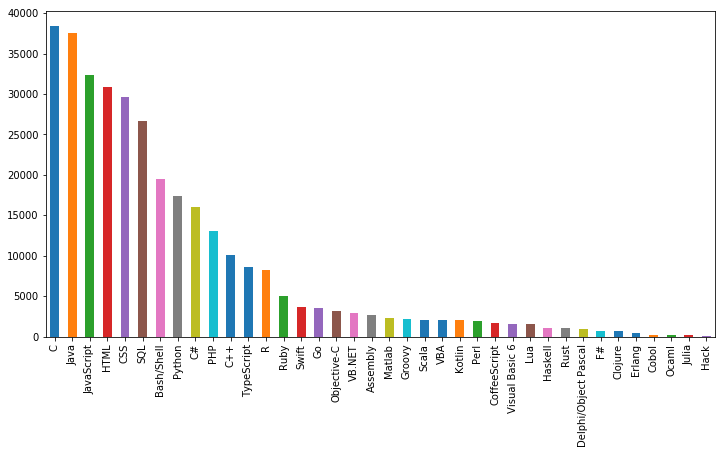

In [59]:

language_counts.plot(kind='bar', figsize=(12,6))

In [ ]:
C, Java, and Javascript are the most popular programming languages. 

In [ ]:
langtype_index = pd.Series([df.loc[:, 'LanguageWorkedWith'].str.contains(langType, regex=False)
                           for langType in language_types],
                          index=language_types,
                          name='LangType_count')

langtype_salary = pd.Series([df[langtype_index[i].fillna(False)]['ConvertedSalary'].median()
                           for i in np.arange(len(language_types))],
                           index=language_types).sort_values(ascending=True)
langtype_salary.plot(kind='bar', figsize=(12,6))
langtype_salary

The highest paying languages include Clojure, F#, Go, Groovy, Scala, and Erlang. They seem to be new languages, which would result in a smaller pool of people qualified in that language

<h3>Job Satisfaction</h3>

6. Are the best paid jobs the most satisfying?

In [119]:
#need help
df['ConvertedSalary'].describe()



count     45738.000000
mean      60610.421684
std       47715.278939
min           0.000000
25%       22452.000000
50%       52614.500000
75%       86000.000000
max      300000.000000
Name: ConvertedSalary, dtype: float64

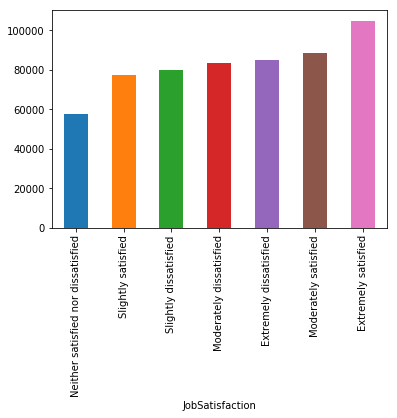

In [128]:
df.groupby('JobSatisfaction').ConvertedSalary.quantile(.75).sort_values().plot(kind='bar')

In [126]:
df['ConvertedSalary'].quantile(.75)

86000.0

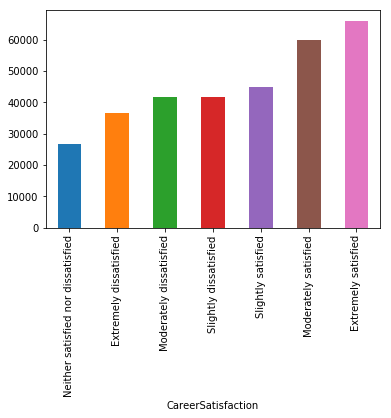

In [127]:
df.groupby('CareerSatisfaction').ConvertedSalary.median().sort_values().plot(kind='bar')

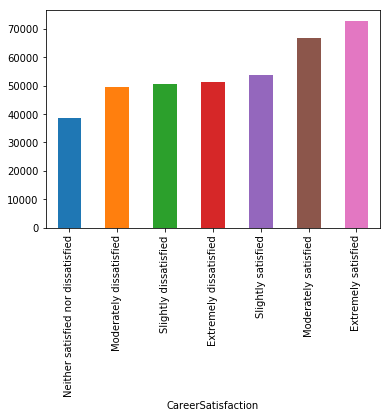

In [17]:
df.groupby('CareerSatisfaction').ConvertedSalary.mean().sort_values().plot(kind='bar')

<h3>Career Satisfaction vs Job Environment

7. Does career satisfaction depends on company or organization size? Are there any other variables that are correlated to career satisfaction?


In [20]:
df.groupby('CareerSatisfaction').CompanySize

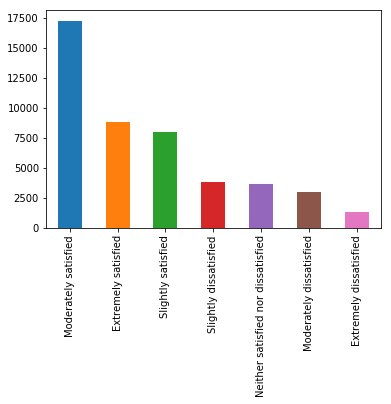

In [30]:
df['CareerSatisfaction'].value_counts().plot(kind='bar')

In [ ]:
happiness = df[['CareerSatisfaction', 'CompanySize']]



In [ ]:


jkl = happiness.groupby('CareerSatisfaction').CompanySize.value_counts().unstack()
jkl

In [ ]:
jkl.plot(kind='bar', figsize=(12,6))

In [ ]:
sns.boxplot(x='JobSatisfaction', y='ConvertedSalary', data=df)